In [1]:
import atmPy.aerosols.size_distribution.sizedistribution as atmsd

# SizeDist (a single size distribution)

## Create instance

### simulate a sizedistribution

In [8]:
sd = atmsd.simulate_sizedistribution(diameter=[10, 2500],
                                    numberOfDiameters=100,
                                    centerOfAerosolMode=200,
                                    widthOfAerosolMode=0.2,
                                    numberOfParticsInMode=1000,)

### format your own data

In [5]:
atmsd.SizeDist(data, bins, distType)

`data` should have a similar structure as below. However, column names are not required as they are calculated based on `bins`

In [11]:
sd.data

bincenters,10.286785,10.876803,11.500663,12.160306,12.857784,13.595267,14.375049,15.199558,16.071358,16.993162,...,1472.324349,1556.772354,1646.064038,1740.477219,1840.305650,1945.859933,2057.468486,2175.478563,2300.257336,2432.193036
0,8.067904e-08,1.653171e-07,3.338144e-07,6.642360e-07,0.000001,0.000003,0.000005,0.000009,0.000017,0.00003,...,0.000049,0.000027,0.000015,0.000008,0.000004,0.000002,0.000001,5.883500e-07,2.949072e-07,1.456683e-07


`bins` are the binedges. For an example of how they should be formatted look again to the sizedistribution generated above

In [12]:
sd.bins

array([  10.        ,   10.57356931,   11.18003679,   11.82128938,
         12.49932225,   13.21624501,   13.97428826,   14.77581054,
         15.62330568,   16.51941053,   17.46691322,   18.46876174,
         19.52807323,   20.64814357,   21.8324577 ,   23.08470046,
         24.40876803,   25.80878004,   27.28909244,   28.85431102,
         30.50930573,   32.25922586,   34.10951604,   36.06593318,
         38.1345644 ,   40.32184597,   42.63458328,   45.07997211,
         47.66562094,   50.39957465,   53.29033955,   56.34690986,
         59.57879565,   62.99605249,   66.6093127 ,   70.42981842,
         74.46945662,   78.74079607,   83.25712644,   88.03249966,
         93.08177363,   98.42065845,  104.06576532,  110.03465819,
        116.34590844,  123.01915263,  130.07515362,  137.53586517,
        145.42450023,  153.76560319,  162.58512621,  171.91050999,
        181.77076917,  192.19658255,  203.22038858,  214.87648629,
        227.20114199,  240.23270211,  254.01171251,  268.58104

To see options for the `distType` argument see help file. This is what our generated was:

In [13]:
sd.distributionType

'dNdDp'

create the instance

In [14]:
sdc = atmsd.SizeDist(sd.data, sd.bins, sd.distributionType)

## Operations

You can add two sizedistributions.

In [18]:
sdnew = sd + sdc

## Properties

Most attributes and methods of a SizeDist are in the form of paroperties. It is worth checking the namespace and find out what there is, including particle, mass, volume concentrations, growth simulation, mode extrapolation.
Some of the properties have setters which will take care of implicit changes to the size distribution.

## Methods

### Plotting

(<Figure size 1280x960 with 1 Axes>,
 <Axes: xlabel='Particle diameter (nm)', ylabel='$\\mathrm{d}N\\,/\\,\\mathrm{d}D_{P}$ (nm$^{-1}\\,$cm$^{-3}$)'>)

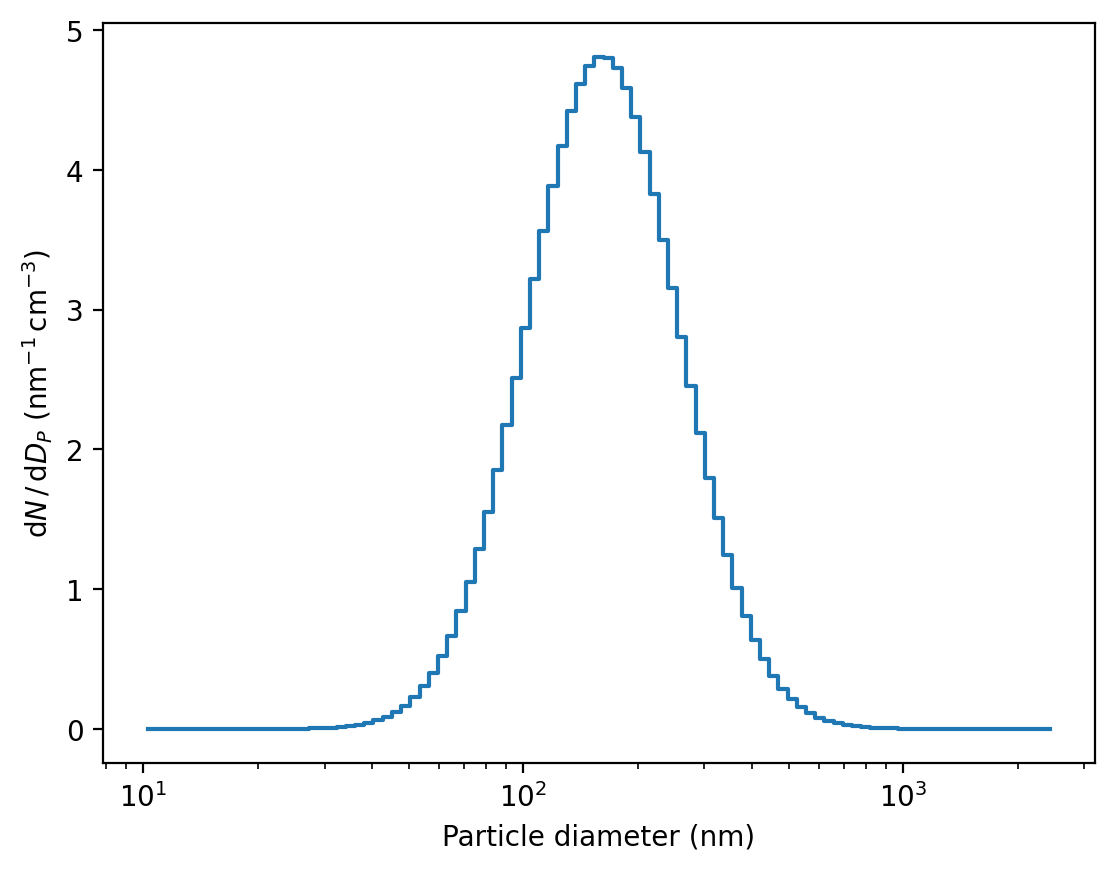

In [19]:
sd.plot()

### Moment conversion

In [31]:
sd = sd.convert2dNdlogDp()

(<Figure size 1280x960 with 1 Axes>,
 <Axes: xlabel='Particle diameter (nm)', ylabel='$\\mathrm{d}N\\,/\\,\\mathrm{d}log(D_{P})$ (cm$^{-3}$)'>)

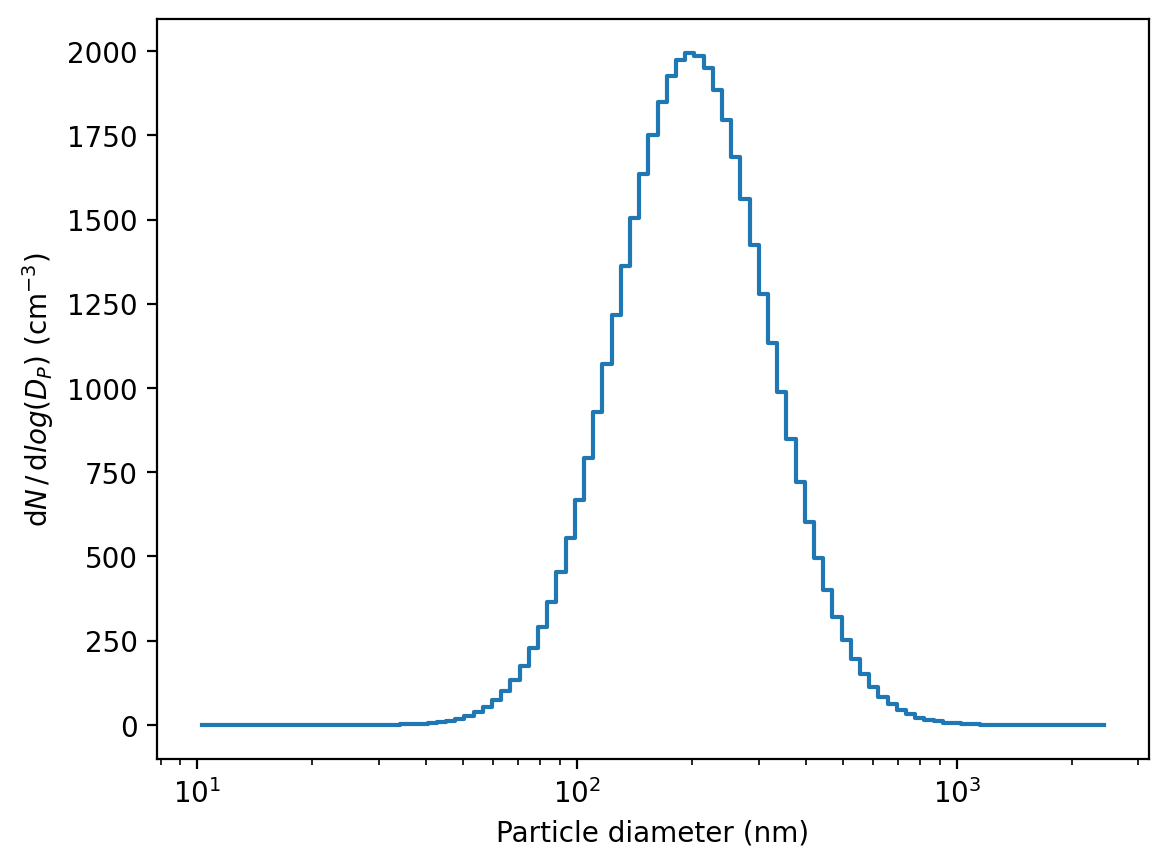

In [32]:
sd.plot()

### optical properties

#### Mie

In [22]:
sd.optical_properties.parameters.refractive_index = 1.5
sd.optical_properties.parameters.wavelength = 500
sd.optical_properties.extinction_coeff # explore namespace for more Mie results

,ext_coeff_m^1
0,0.000086


#### t-matrix

In [33]:
sd.optical_properties.parameters.refractive_index = 1.5
sd.optical_properties.parameters.wavelength = 500
sd.optical_properties.parameters.asphericity = 5
sd.optical_properties.scattering_coeff # explore namespace for more Mie results

### hygroscopic growth

**GOTCHA** you can loose particles when applying growth!!! See help of `sd.grow_sizedistribution` function! There are functions that extrapolate size distributions assuming normal distributions. Consider using those.

In [85]:
reload(atmsd.hygroscopicity)
reload(atmsd)

<module 'atmPy.aerosols.size_distribution.sizedistribution' from '/export/htelg/prog/atm-py/atmPy/aerosols/size_distribution/sizedistribution.py'>

In [86]:
sd = atmsd.SizeDist(sd.data, sd.bins, sd.distributionType)

In [92]:
sd.hygroscopicity.parameters.kappa = 0.6
sd.hygroscopicity.parameters.RH = 80

/export/htelg/prog/atm-py/atmPy/aerosols/size_distribution/diameter_binning.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def match_bins(index, columns, df_match):
/export/htelg/prog/atm-py/atmPy/aerosols/size_distribution/diameter_binning.py:81: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def match2data(data, df_match,new_data):


(<Figure size 1280x960 with 1 Axes>,
 <Axes: xlabel='Particle diameter (nm)', ylabel='Particle number in bin'>)

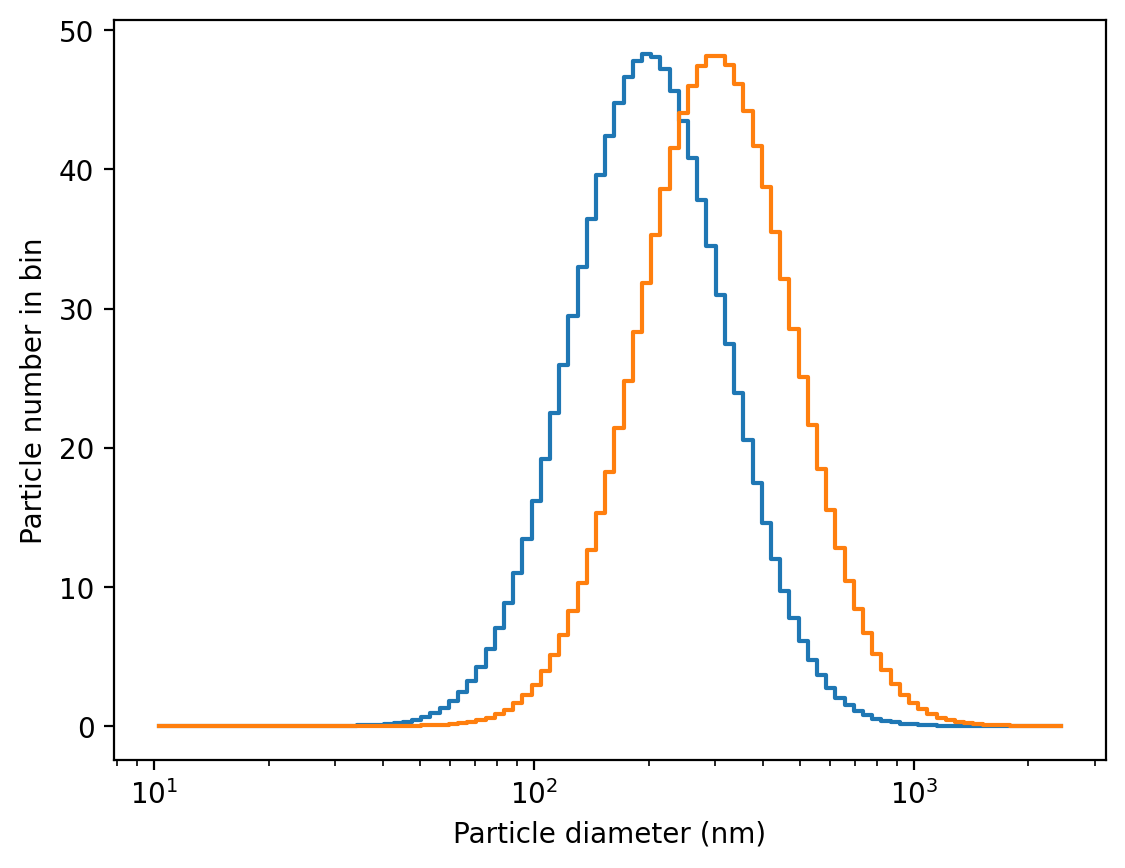

In [93]:
f,a = sd.plot()
sd.hygroscopicity.grown_size_distribution.plot(ax= a)